In [18]:
# Import the needed referances
import pandas as pd
import numpy as np
import csv as csv
import seaborn as sns
from umap import UMAP
from babyplots import Babyplot
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline

pd.options.display.max_columns = None
pd.options.display.max_rows = 100

In [19]:
mydata = pd.read_excel('Medical Data(Categorically int).xlsx')

In [20]:
mydata

,Age,Sex,Hypertension,Diabetes,Dyslipidemia,TobaccoUse,LMCA,RCA,LAD,CIRC,Vessel,Stent,PriorPCI,PriorCABG,HxHF,PreProcLVEF,PreProcMedAdmin-Aspirin,PreProcMedAdmin-Beta Blocker,PreProcMedAdmin-Statin,AccessSite,FluoroTime,PreProcCreat,HGB,LipidsTC,LipidsHDL,PreProcTnTND,PostProcCreat,PostProcHgb,Dominance,PCIStatus,PCIIndication,Discharge_Status
0,55,0,0,0,0,0,0,1,0,1,2,1,0,0,0,30,0,0,0,0,11,0.94,14.7,94,29,0,1.12,15.0,0,0,0,0
1,63,1,1,0,0,1,0,0,1,1,2,1,0,0,0,25,1,0,1,1,6,0.88,12.6,146,48,1,0.86,11.2,1,0,1,0
2,41,0,1,0,0,1,0,0,1,0,1,1,0,0,0,40,0,0,0,0,17,0.77,14.5,92,-1,1,0.73,14.9,1,0,0,0
3,40,0,0,0,0,1,0,1,0,1,2,1,0,0,0,40,1,1,1,1,17,0.67,16.5,240,34,1,0.70,17.1,1,0,0,0
4,63,0,0,1,0,1,0,1,0,1,2,2,0,0,0,35,1,0,0,1,26,0.97,9.3,82,26,1,0.90,9.4,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3870,66,0,0,1,0,1,0,1,1,1,3,1,1,0,0,40,0,0,0,0,21,1.07,14.4,204,38,1,0.98,13.4,2,0,1,0
3871,58,0,1,0,0,1,0,1,0,1,2,2,1,0,0,60,0,0,0,0,61,1.01,15.9,212,57,1,1.01,13.1,1,0,0,0
3872,53,0,1,1,0,0,0,1,1,1,3,1,1,0,0,40,0,0,0,0,23,1.26,16.6,243,38,1,1.46,14.5,1,0,0,0
3873,58,0,0,0,0,1,0,0,1,1,2,2,1,0,0,60,0,0,0,0,66,0.77,9.3,-1,-1,1,0.90,9.7,1,0,0,0


<AxesSubplot:>

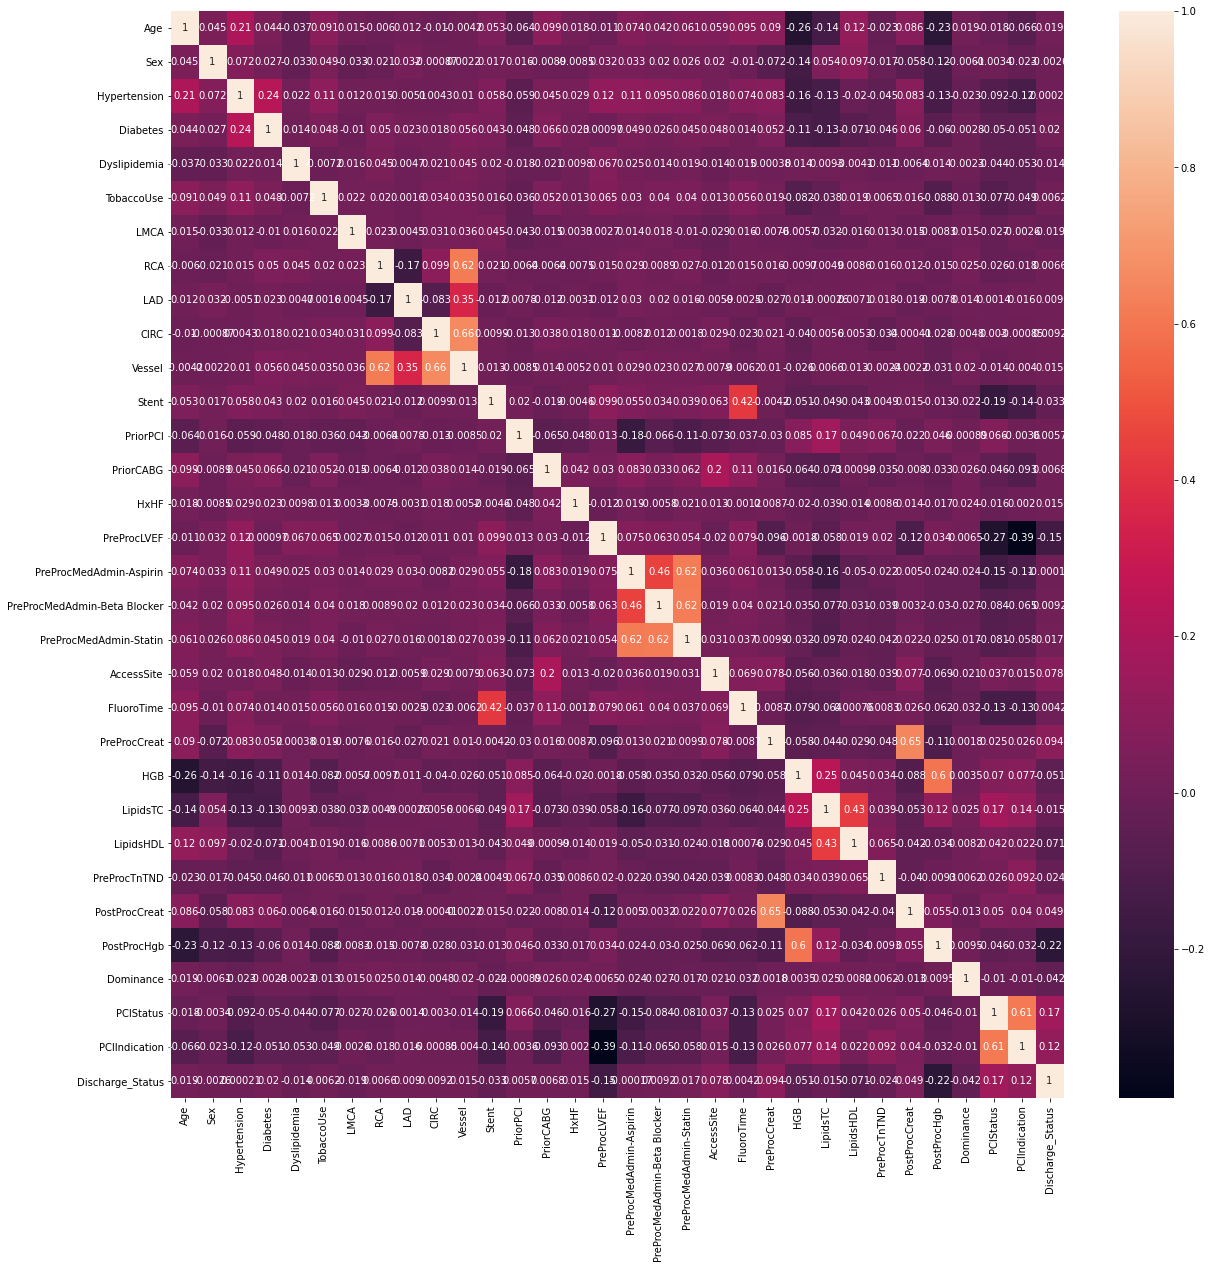

In [68]:
mydata_corr = mydata.corr()
plt.figure(figsize=(20,20))
sns.heatmap(mydata_corr, annot=True)

# Feature Selection

In [21]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.ensemble import RandomForestClassifier

In [22]:
X=mydata.drop('Discharge_Status', axis=1)
Y=mydata['Discharge_Status']

In [23]:
# # apply SelectKBest top 10 features
# best_features = SelectKBest(score_func=chi2, k=10)
# fit = best_features.fit(X,Y)
# dfscore=pd.DataFrame(fit.scores_)
# dfcol=pd.DataFrame(X.columns)
# featureScores = pd.concat([dfscore,dfcol], axis=1)
# featureScores.columns=['Score', 'Feature']
# featureScores.sort_values(['Score'],ascending=False).reset_index(drop=True)

In [24]:
model = RandomForestClassifier()
model.fit(X,Y)
print(sum(model.feature_importances_),'\n',model.feature_importances_)
featureImportance = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['Importance']).sort_values(['Importance'],ascending=False)
featureImportance 


1.0 
 [0.0493735  0.00906864 0.01162827 0.0103309  0.         0.00346634
 0.00240012 0.00824275 0.00558922 0.00935782 0.01907042 0.02204357
 0.00610084 0.00727764 0.00196441 0.07765472 0.01283847 0.00699608
 0.01371393 0.01749501 0.05475896 0.10672288 0.05137501 0.06570018
 0.05390236 0.01018001 0.17828451 0.09231547 0.01420681 0.0354607
 0.04248045]


,Importance
PostProcCreat,0.178285
PreProcCreat,0.106723
PostProcHgb,0.092315
PreProcLVEF,0.077655
LipidsTC,0.065700
FluoroTime,0.054759
LipidsHDL,0.053902
HGB,0.051375
Age,0.049374
PCIIndication,0.042480


# UMAP

In [4]:
# sns.pairplot(mydata, hue='Dischage Status')

In [29]:
reducer = UMAP(n_neighbors=10, # default 15, The size of local neighborhood (in terms of number of neighboring sample points) used for manifold approximation.
               n_components=3, # default 2, The dimension of the space to embed into.
               metric='euclidean', # default 'euclidean', The metric to use to compute distances in high dimensional space.
               n_epochs=100, # default None, The number of training epochs to be used in optimizing the low dimensional embedding. Larger values result in more accurate embeddings. 
               learning_rate=1.0, # default 1.0, The initial learning rate for the embedding optimization.
               init='spectral', # default 'spectral', How to initialize the low dimensional embedding. Options are: {'spectral', 'random', A numpy array of initial embedding positions}.
               min_dist=0.1, # default 0.1, The effective minimum distance between embedded points.
               spread=1.0, # default 1.0, The effective scale of embedded points. In combination with ``min_dist`` this determines how clustered/clumped the embedded points are.
               low_memory=False, # default False, For some datasets the nearest neighbor computation can consume a lot of memory. If you find that UMAP is failing due to memory constraints consider setting this option to True.
               set_op_mix_ratio=1.0, # default 1.0, The value of this parameter should be between 0.0 and 1.0; a value of 1.0 will use a pure fuzzy union, while 0.0 will use a pure fuzzy intersection.
               local_connectivity=1, # default 1, The local connectivity required -- i.e. the number of nearest neighbors that should be assumed to be connected at a local level.
               repulsion_strength=1.0, # default 1.0, Weighting applied to negative samples in low dimensional embedding optimization.
               negative_sample_rate=5, # default 5, Increasing this value will result in greater repulsive force being applied, greater optimization cost, but slightly more accuracy.
               transform_queue_size=4.0, # default 4.0, Larger values will result in slower performance but more accurate nearest neighbor evaluation.
               a=None, # default None, More specific parameters controlling the embedding. If None these values are set automatically as determined by ``min_dist`` and ``spread``.
               b=None, # default None, More specific parameters controlling the embedding. If None these values are set automatically as determined by ``min_dist`` and ``spread``.
               random_state=42, # default: None, If int, random_state is the seed used by the random number generator;
               metric_kwds=None, # default None) Arguments to pass on to the metric, such as the ``p`` value for Minkowski distance.
               angular_rp_forest=False, # default False, Whether to use an angular random projection forest to initialise the approximate nearest neighbor search.
               target_n_neighbors=-1, # default -1, The number of nearest neighbors to use to construct the target simplcial set. If set to -1 use the ``n_neighbors`` value.
               #target_metric='categorical', # default 'categorical', The metric used to measure distance for a target array is using supervised dimension reduction. By default this is 'categorical' which will measure distance in terms of whether categories match or are different. 
               #target_metric_kwds=None, # dict, default None, Keyword argument to pass to the target metric when performing supervised dimension reduction. If None then no arguments are passed on.
               #target_weight=0.5, # default 0.5, weighting factor between data topology and target topology.
               transform_seed=42, # default 42, Random seed used for the stochastic aspects of the transform operation.
               verbose=False, # default False, Controls verbosity of logging.
               unique=False, # default False, Controls if the rows of your data should be uniqued before being embedded. 
              )

# mydata_arr = mydata.values
mydata_arr = mydata.drop('Discharge_Status', axis=1).values
mydata_arr

array([[55.,  0.,  0., ...,  0.,  0.,  0.],
       [63.,  1.,  1., ...,  1.,  0.,  1.],
       [41.,  0.,  1., ...,  1.,  0.,  0.],
       ...,
       [53.,  0.,  1., ...,  1.,  0.,  0.],
       [58.,  0.,  0., ...,  1.,  0.,  0.],
       [50.,  0.,  0., ...,  1.,  1.,  6.]])

In [30]:
sc = StandardScaler()
scaled_mydata_arr = sc.fit_transform(mydata_arr)
# test_data = sc.transform(test) For scaling Test data

embedding = reducer.fit_transform(scaled_mydata_arr)
embedding.shape

(3875, 3)

In [31]:
bp = Babyplot()
bp.add_plot(embedding.tolist(), 'pointCloud', 'categories', mydata.Discharge_Status.tolist(),
           {
#                'colorScale':'Set2',
               'showLegend':True,
               'folded':True,
               'foldedEmbedding':embedding.tolist()
           })
bp

<IPython.core.display.Javascript object>

In [33]:
embedding

array([[ 6.38905   , -0.2580182 ,  7.902593  ],
       [ 8.425724  ,  1.9048932 ,  6.256548  ],
       [ 8.199753  ,  2.297406  ,  5.5603433 ],
       ...,
       [ 9.804667  ,  0.20773797,  3.243818  ],
       [10.955569  ,  1.6757262 ,  5.6553993 ],
       [ 7.966913  ,  2.7857869 , 11.101865  ]], dtype=float32)

Text(0.5, 1.0, 'UMAP projection of the Medical dataset')

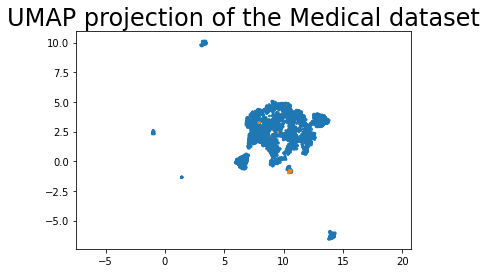

In [32]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    embedding[:, 2],
    c=[sns.color_palette()[x] for x in mydata.Discharge_Status.map({0:0, 1:1})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Medical dataset', fontsize=24)

In [28]:
len(mydata.columns)

32

In [1]:
# Here we have also taken the label for dimensionality reduction

Text(0.5, 1.0, 'UMAP projection of the Medical dataset')

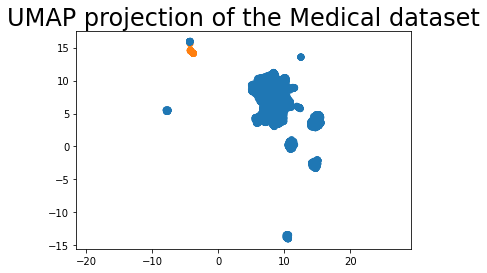

In [39]:
reducer=UMAP(random_state=42)
mydata_arr = mydata.values

sc = StandardScaler()
scaled_mydata_arr = sc.fit_transform(mydata_arr)
# test_data = sc.transform(test) For scaling Test data

embedding = reducer.fit_transform(scaled_mydata_arr)
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
#     embedding[:, 2],
    c=[sns.color_palette()[x] for x in mydata.Discharge_Status.map({0:0, 1:1})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Medical dataset', fontsize=24)


In [37]:
def check_random_state(seed):
    if seed is None or seed is np.random:
        return np.random.mtrand._rand


from sklearn.utils import check_random_state
rng = check_random_state(reducer.random_state)
print(rng)

RandomState(MT19937)
